In [1]:
!git clone https://github.com/alegoupil/Minecraft_database

Cloning into 'Minecraft_database'...
remote: Enumerating objects: 33353, done.
remote: Counting objects: 100% (6040/6040), done.
remote: Compressing objects: 100% (3572/3572), done.
remote: Total 33353 (delta 1), reused 6040 (delta 1), pack-reused 27313 (from 1)
Receiving objects: 100% (33353/33353), 1.97 GiB | 35.53 MiB/s, done.
Resolving deltas: 100% (9/9), done.
Updating files: 100% (23015/23015), done.


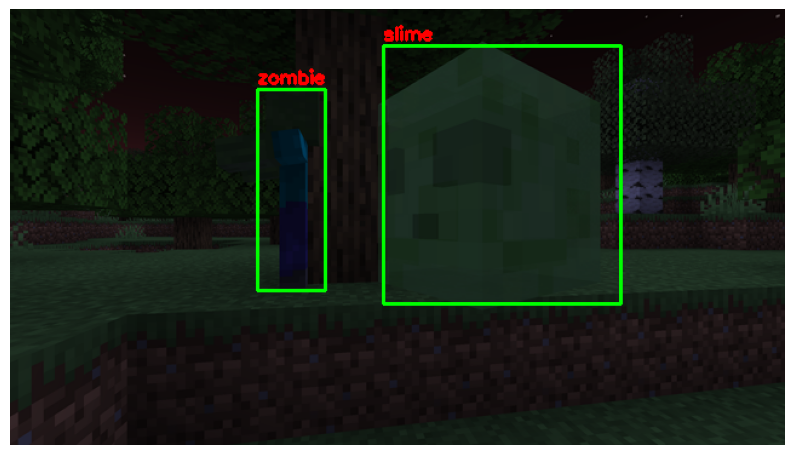

In [2]:
# Show an image from the database
import os
import cv2
import matplotlib.pyplot as plt

image_path = 'Minecraft_database/train/images/1114.png'
label_path = 'Minecraft_database/train/labels/1114.txt'

# Define class names
class_names = ['araignee', 'slime', 'sorciere', 'cochon', 'zombie', 'squelette', 'endermen', 'creeper']

# Load image
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
h, w, _ = img.shape

# Draw bounding boxes
if os.path.exists(label_path):
    with open(label_path, 'r') as f:
        for line in f:
            cls, x, y, bw, bh = map(float, line.strip().split())
            # Convert YOLO to pixel coordinates
            x1 = int((x - bw / 2)*640)
            y1 = int((y - bh / 2)*360)
            x2 = int((x + bw / 2)*640)
            y2 = int((y + bh / 2)*360)
            # Draw box and label
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(img, class_names[int(cls)], (x1, y1 - 5),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

# Show image
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
!pip install ultralytics

In [ ]:
!yolo detect train data=/content/Minecraft_database/mobs.yaml model=yolo11s.pt epochs=50